# Aufgabe 1

Korrelationskoeffizient nach Pearson berechnen sowie das Bestimmtheitsmaß für den Zusammenhang ID zu durchschnittliche Messzeit. Interpretieren.

In [38]:
import pandas as pd 


mouse = pd.read_csv('Testdaten_Mouse.csv', delimiter=";")
touch = pd.read_csv("Testdaten_Touchpad.csv", delimiter=";")

print(mouse.head())
print(touch.head())

print(mouse.info())

   ID    AVG
0   1  264,8
1   2    308
2   3  392,8
3   4  572,8
4   5    756
   ID    AVG
0   1  307,8
1   2  307,1
2   3  396,9
3   4  526,4
4   5  717,2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30 non-null     int64 
 1   AVG     30 non-null     object
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes
None


In [39]:
mouse['AVG'] = mouse['AVG'].str.replace(",", ".")
print(mouse.head())

   ID    AVG
0   1  264.8
1   2    308
2   3  392.8
3   4  572.8
4   5    756


In [40]:
touch['AVG'] = touch['AVG'].str.replace(",", ".")
print(touch.head())

   ID    AVG
0   1  307.8
1   2  307.1
2   3  396.9
3   4  526.4
4   5  717.2


In [41]:
mouse['AVG'] = mouse['AVG'].astype(float)
print(mouse.info())
print(mouse)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30 non-null     int64  
 1   AVG     30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None
    ID    AVG
0    1  264.8
1    2  308.0
2    3  392.8
3    4  572.8
4    5  756.0
5    6  774.4
6    1  193.6
7    2  272.8
8    3  300.8
9    4  449.6
10   5  518.4
11   6  810.4
12   1  183.2
13   2  257.7
14   3  386.4
15   4  449.6
16   5  608.5
17   6  614.8
18   1  516.8
19   2  488.0
20   3  540.8
21   4  603.2
22   5  656.0
23   6  712.8
24   1  361.1
25   2  273.2
26   3  452.8
27   4  521.6
28   5  592.8
29   6  700.0


In [42]:
touch['AVG'] = touch['AVG'].astype(float)
print(touch.info())
print(touch)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30 non-null     int64  
 1   AVG     30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None
    ID     AVG
0    1   307.8
1    2   307.1
2    3   396.9
3    4   526.4
4    5   717.2
5    6   857.9
6    1   275.3
7    2   324.7
8    3   345.3
9    4   476.3
10   5   690.0
11   6   727.1
12   1   391.1
13   2   483.7
14   3   532.3
15   4   670.4
16   5   883.1
17   6  1028.4
18   1   245.9
19   2   302.2
20   3   548.4
21   4   661.2
22   5   820.9
23   6   870.6
24   1   263.1
25   2   391.6
26   3   525.9
27   4   577.1
28   5   702.4
29   6   968.3


# Aufgabe 2

. Koeffizienten der Regressionsgraden bestimmen

In [43]:
import numpy as np
import matplotlib.pyplot as plt 
corr_mouse = np.corrcoef(mouse['ID'], mouse['AVG'])[0, 1]
corr_touch = np.corrcoef(touch['ID'], touch['AVG'])[0, 1]

print(corr_mouse, '\n',corr_touch) # * Korrelationskoeffizienz

0.8633773277811395 
 0.9289729361862555


In [44]:
# * Bestimmtheitsmaß
r_2_mouse = corr_mouse * corr_mouse
r_2_touch = corr_touch * corr_touch

print(f'Bestimmtheitsmaß von mouse: {r_2_mouse}, \nBestimmheitsmaß von touchpad: {r_2_touch}')

Bestimmtheitsmaß von mouse: 0.7454204101265012, 
Bestimmheitsmaß von touchpad: 0.8629907161665128


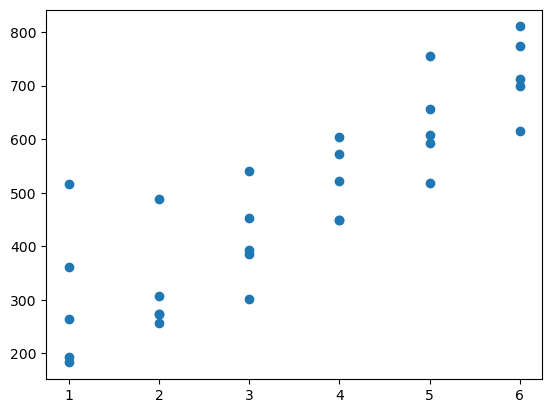

In [45]:
# scatter plot of mouse data
plt.scatter(mouse['ID'], mouse['AVG'])
plt.show()

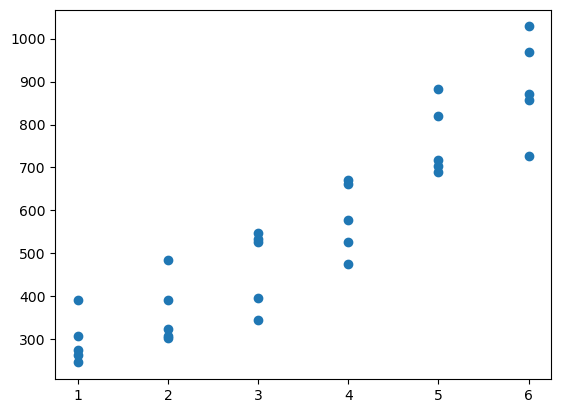

In [46]:
plt.scatter(touch['ID'], touch['AVG'])
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression
X_mouse = mouse['ID'].values.reshape(-1, 1)
y_mouse = mouse['AVG'].values.reshape(-1, 1)

reg_mouse = LinearRegression()
reg_mouse.fit(X_mouse, y_mouse)

print(reg_mouse.intercept_, reg_mouse.coef_)


[172.78266667] [[89.04971429]]


In [48]:
X_touch = touch['ID'].values.reshape(-1, 1)
y_touch = touch['AVG'].values.reshape(-1, 1)

reg_touch = LinearRegression()
reg_touch.fit(X_touch, y_touch)

print(reg_touch.intercept_, reg_touch.coef_)

[132.2] [[122.40571429]]


# Aufgabe 3

 t-Statistiken berechnen und Signifikanz der Regression
anhand der t-Verteilungstabelle für 𝛼 = 0,05 bewerten

## 1) am beispeil von mouse

$H_0: b_1=0, kein\ Zusammenhang$

$H_1: b_1\neq 0$

Ergebnis der Herleitung:

$$
t_{n-2} = \frac{b_1*\sqrt{n-2}}{\sqrt{\frac{\sum{(y_i-\widehat{y})^2}}{\sum{(x_i - \overline{x})^2}}}}
$$

In [55]:
b_1 = corr_mouse
n = 6

x = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y_hut = reg_mouse.predict(x)

#up = b_1 * np.sqrt(n-2)
((np.array(mouse['AVG']) - y_hut) ** 2).sum() / 



[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[261.83238095]
 [350.88209524]
 [439.93180952]
 [528.98152381]
 [618.0312381 ]
 [707.08095238]]


range(1, 7)
